In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data=pd.read_csv("day.csv")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
def conweekday(x):
    d={0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'}
    if x in d:
        return d[x]
data['weekday']=data['weekday'].apply(lambda x:conweekday(x)).astype('object')

In [4]:
def conmnth(x):
    d={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
    if x in d:
        return d[x]
data['mnth']=data['mnth'].apply(lambda x:conmnth(x)).astype('object')

In [5]:
def conseason(x):
    d={1:'spring',2:'summer',3:'fall',4:'winter'}
    if x in d:
        return d[x]
data['season']=data['season'].apply(lambda x:conseason(x)).astype('object')


In [6]:
#data['yr']=data['yr'].apply(lambda x:2012 if(x==1) else 2011)

In [7]:
def conweather(x):
    d={1:'partly_cloudy',2:'cloudy',3:'light_rain',4:'heavy_rain'}
    if x in d:
        return d[x]
data['weathersit']=data['weathersit'].apply(lambda x:conweather(x)).astype('object')

In [8]:
uncolumns=['instant','dteday','casual','registered']
data=data.drop(uncolumns,axis=1)

In [9]:
data['temp']=data['temp'].apply(lambda x:x*41)
data['atemp']=data['atemp'].apply(lambda x:x*50)
data['hum']=data['hum'].apply(lambda x:x*100)
data['windspeed']=data['windspeed'].apply(lambda x:x*67)

In [10]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,spring,1,dec,0,thursday,1,cloudy,10.420847,11.33210,65.2917,23.458911,2114
727,spring,1,dec,0,friday,1,cloudy,10.386653,12.75230,59.0000,10.416557,3095
728,spring,1,dec,0,saturday,0,cloudy,10.386653,12.12000,75.2917,8.333661,1341
729,spring,1,dec,0,sunday,0,partly_cloudy,10.489153,11.58500,48.3333,23.500518,1796


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.7+ KB


In [12]:
data['season'].value_counts()

season
fall      188
summer    184
spring    181
winter    178
Name: count, dtype: int64

In [13]:
data['mnth'].value_counts()

mnth
jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    57
Name: count, dtype: int64

In [14]:
data['holiday'].astype('category').value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [15]:
data['weathersit'].unique() #extracting the type of weather situations present in data

array(['cloudy', 'partly_cloudy', 'light_rain'], dtype=object)

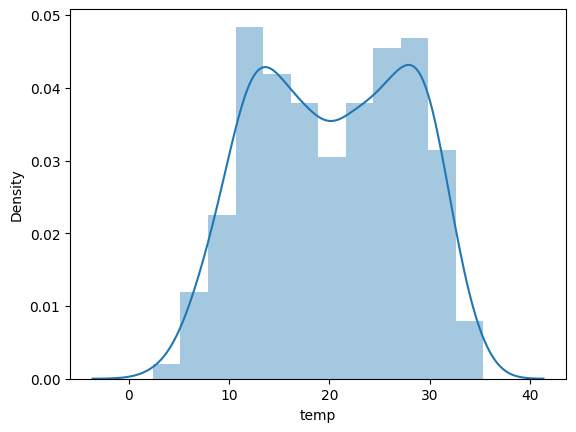

In [16]:
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data['temp'])
plt.show()

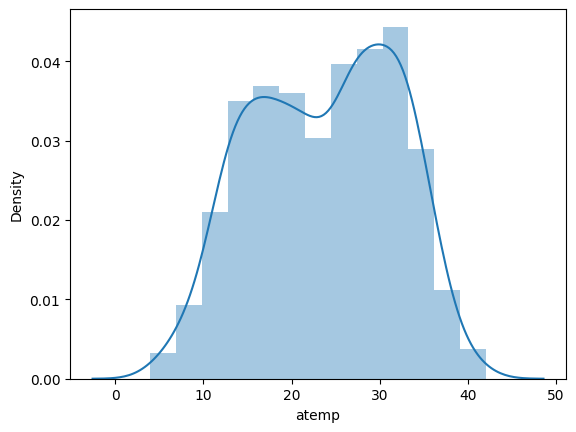

In [17]:
#feeling temperature
sns.distplot(data['atemp'])
plt.show()

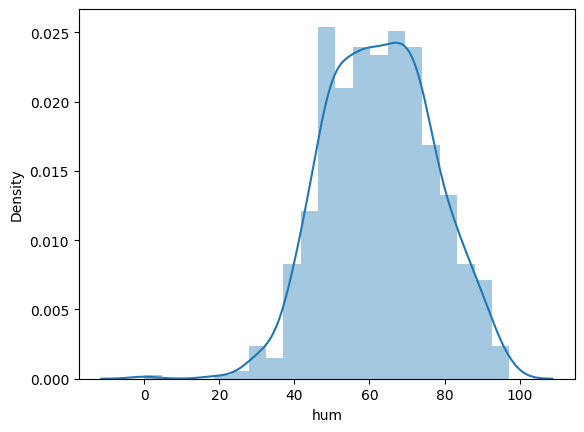

In [18]:
sns.distplot(data['hum'])
plt.show()

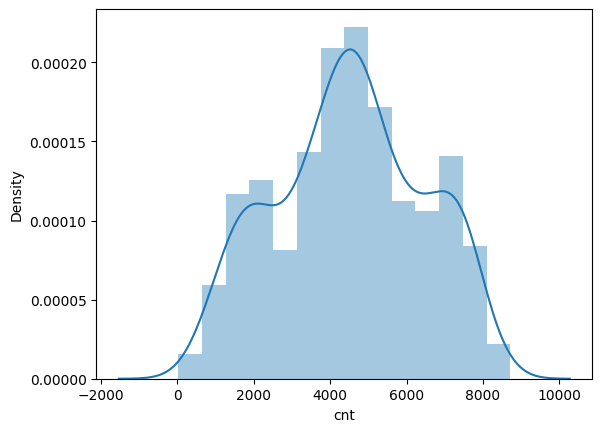

In [19]:
sns.distplot(data['cnt'])
plt.show()

In [20]:
# selecting only categorical data
d_category=data.select_dtypes(exclude=['int64','float64'])
d_category

,season,mnth,weekday,weathersit
0,spring,jan,saturday,cloudy
1,spring,jan,sunday,cloudy
2,spring,jan,monday,partly_cloudy
3,spring,jan,tuesday,partly_cloudy
4,spring,jan,wednesday,partly_cloudy
...,...,...,...,...
726,spring,dec,thursday,cloudy
727,spring,dec,friday,cloudy
728,spring,dec,saturday,cloudy
729,spring,dec,sunday,partly_cloudy


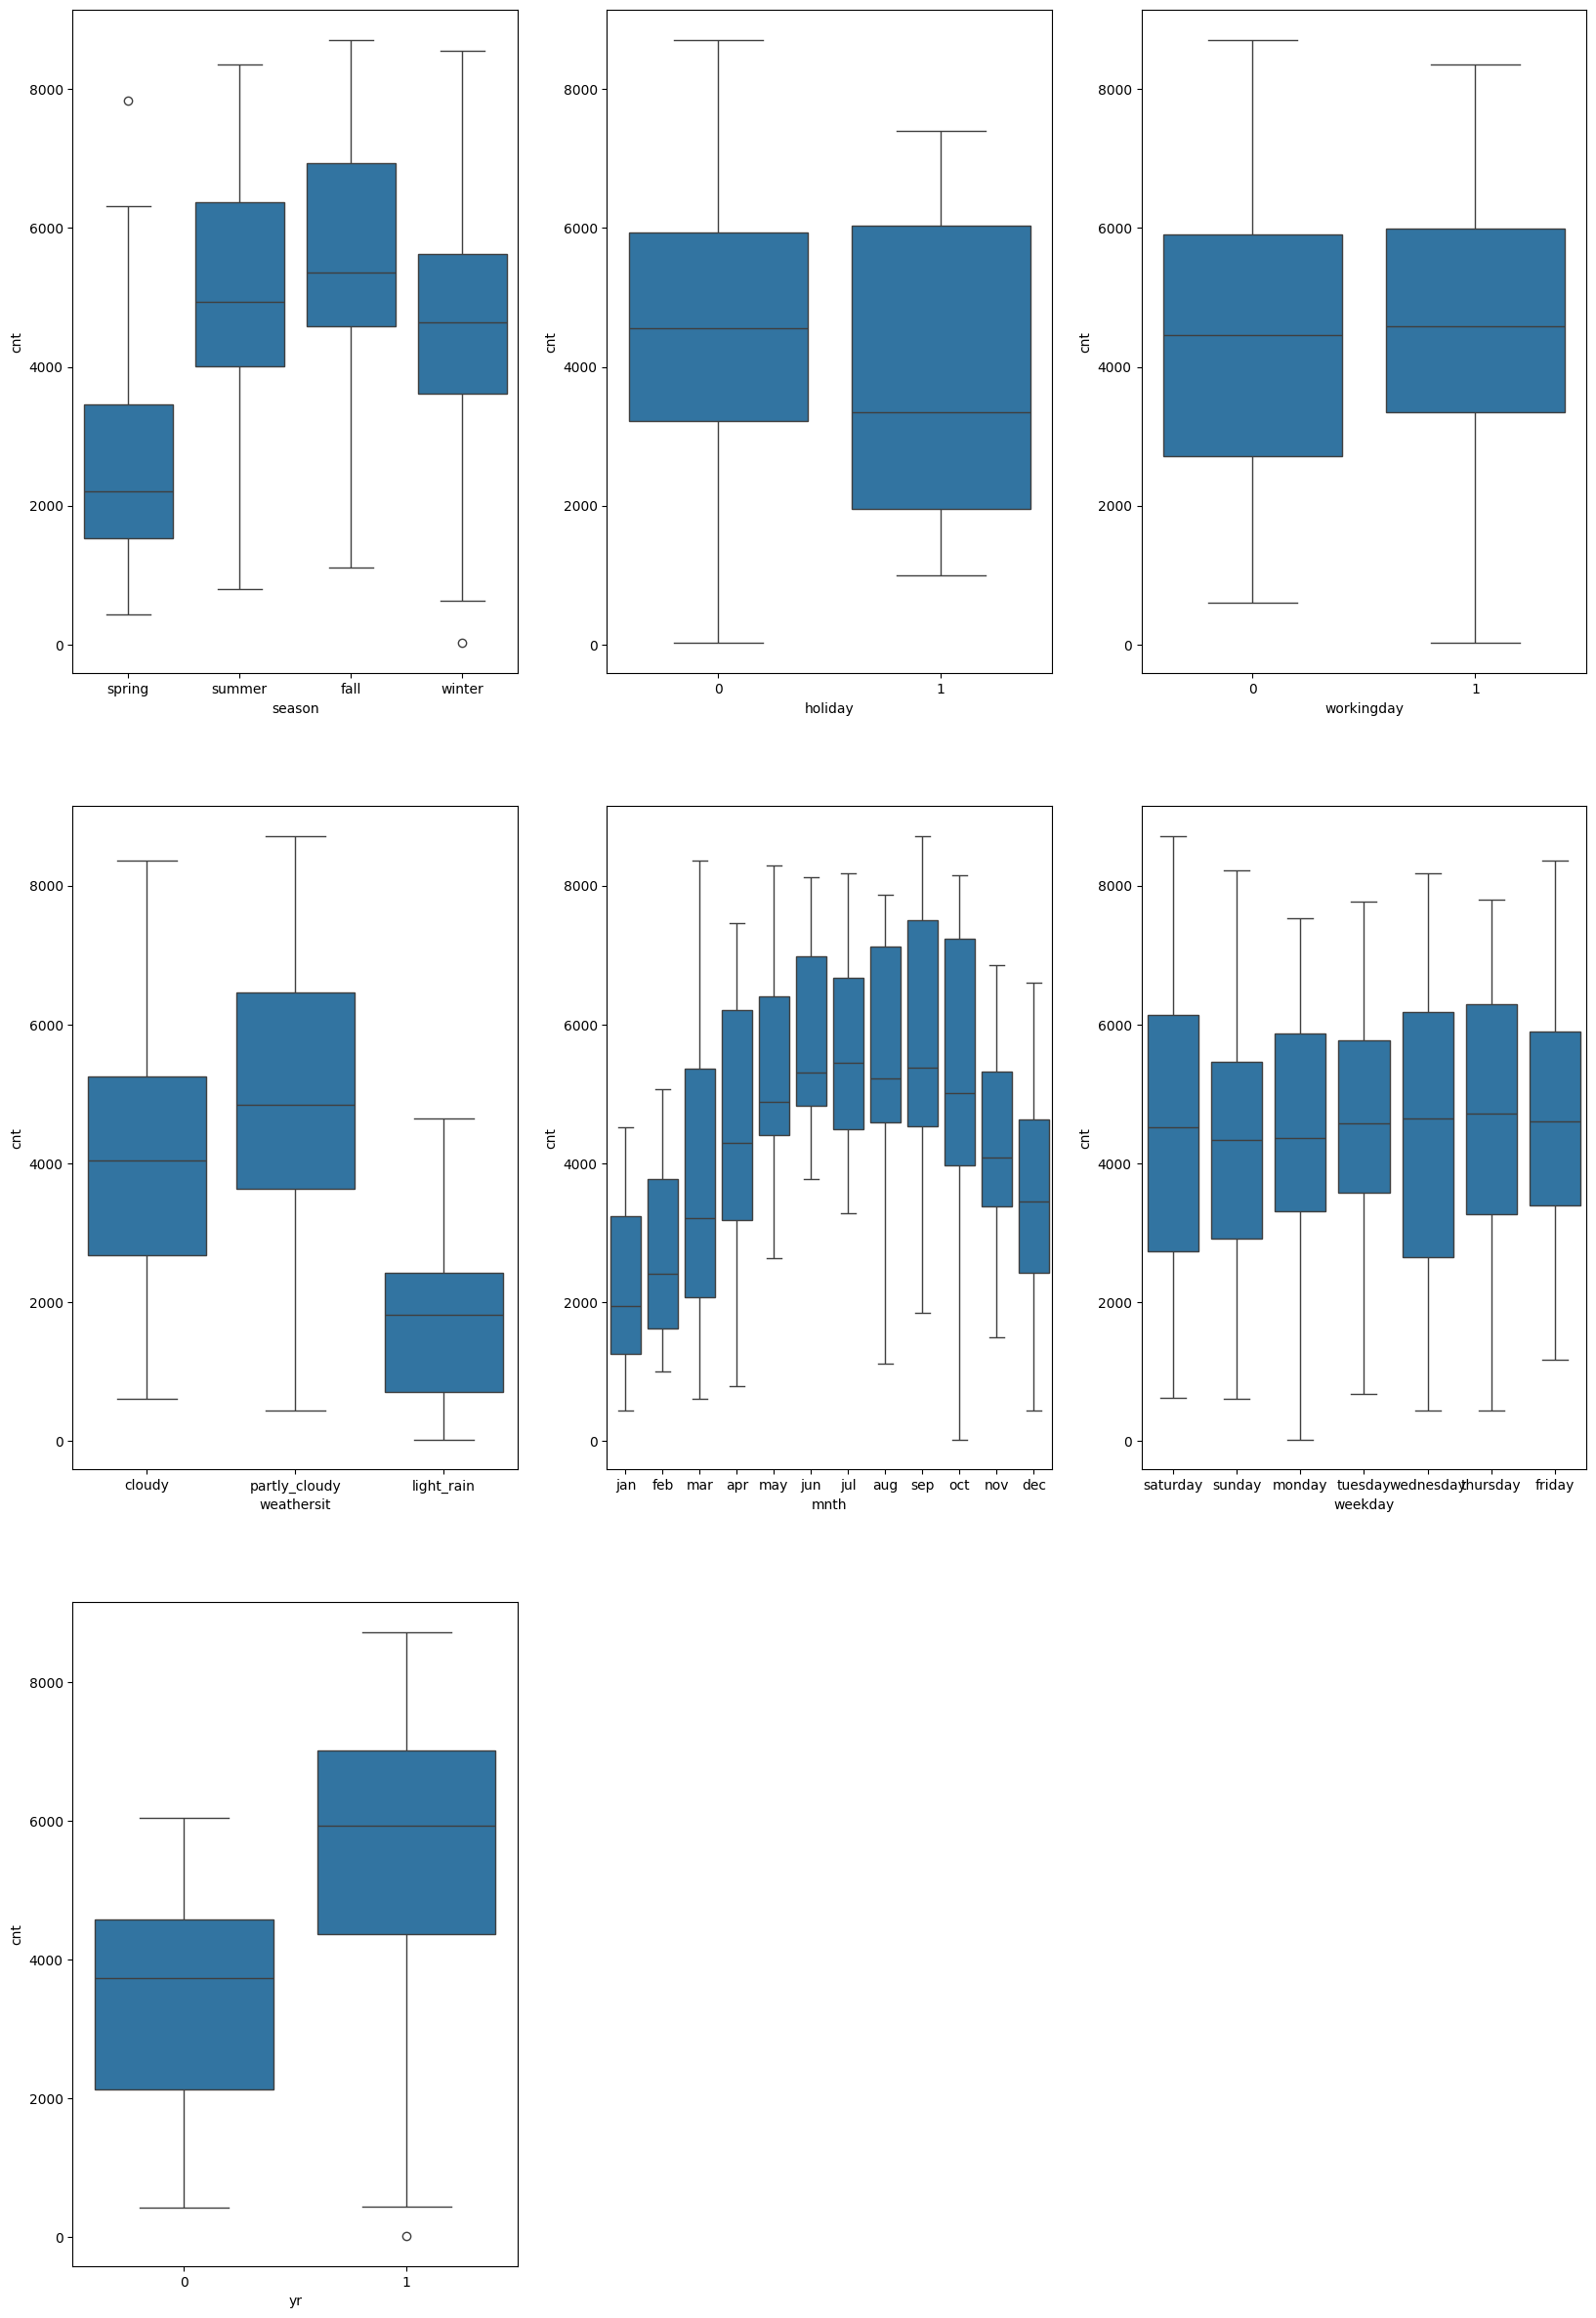

In [21]:
plt.figure(figsize=(20,30))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt',data=data)
plt.show()

In [22]:
data['cnt']=data['cnt'].astype('float64')

In [23]:
d_continous=data.select_dtypes(include=['float64']) #selecting continous data
d_continous

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985.0
1,14.902598,17.68695,69.6087,16.652113,801.0
2,8.050924,9.47025,43.7273,16.636703,1349.0
3,8.200000,10.60610,59.0435,10.739832,1562.0
4,9.305237,11.46350,43.6957,12.522300,1600.0
...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,2114.0
727,10.386653,12.75230,59.0000,10.416557,3095.0
728,10.386653,12.12000,75.2917,8.333661,1341.0
729,10.489153,11.58500,48.3333,23.500518,1796.0


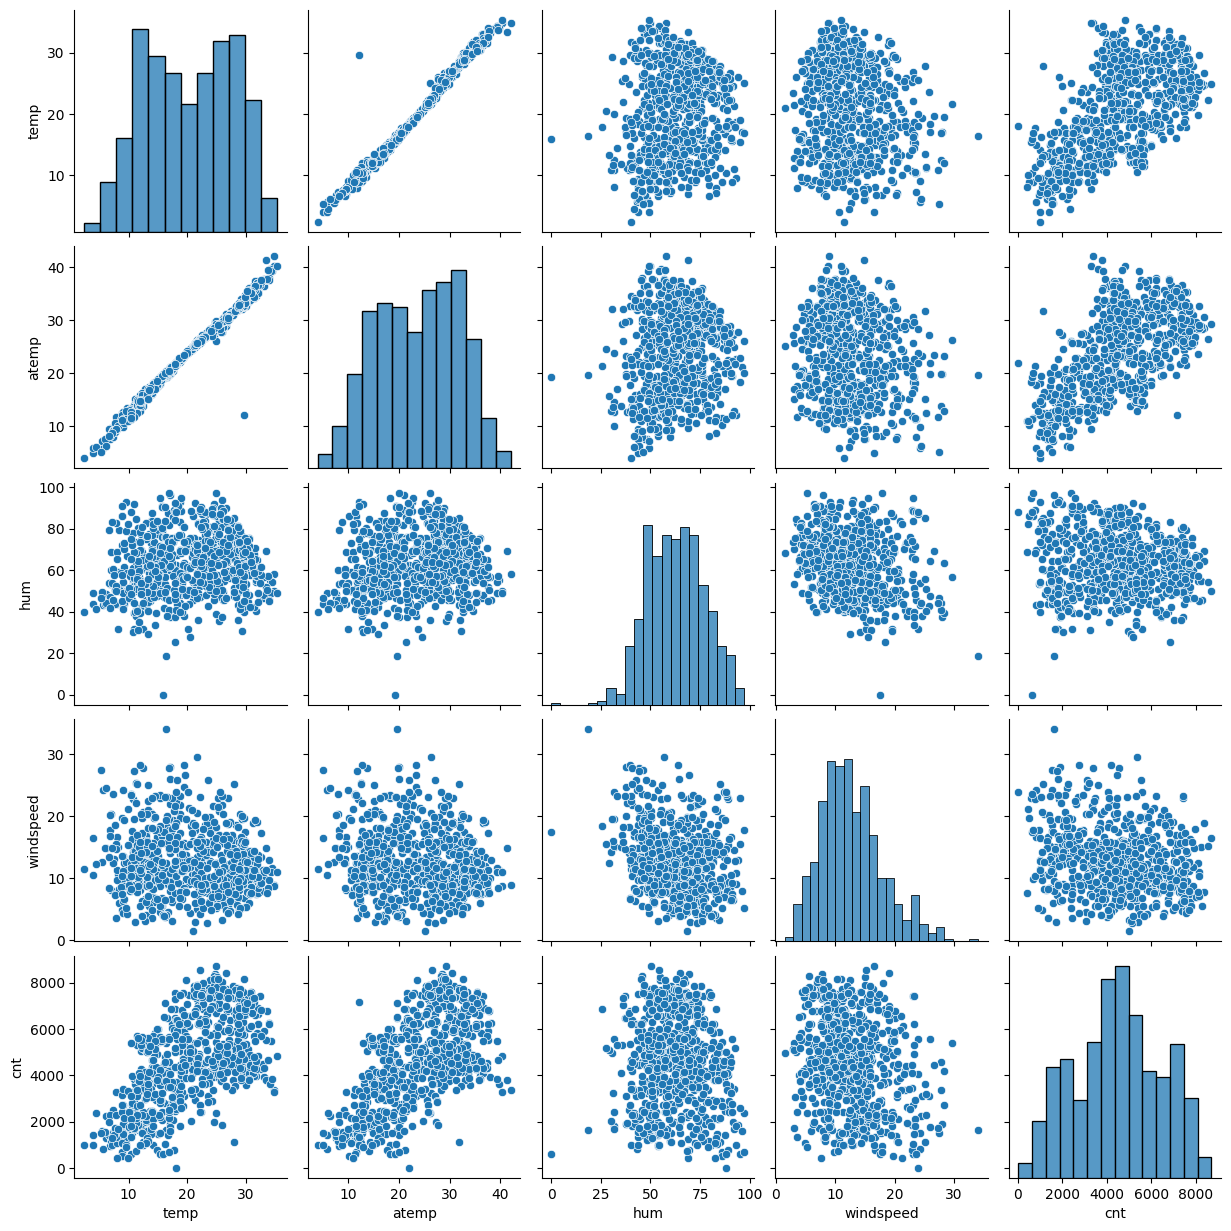

In [24]:
sns.pairplot(d_continous) #to check assumptions of linear regression
plt.show()

In [25]:
cor=d_continous.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


In [26]:
#plot the correlations on heatmap for better visualization
import numpy as np
mask=np.array(cor)
mask

array([[ 1.        ,  0.99170155,  0.12696294, -0.15794412,  0.62749401],
       [ 0.99170155,  1.        ,  0.13998806, -0.18364297,  0.6310657 ],
       [ 0.12696294,  0.13998806,  1.        , -0.2484891 , -0.10065856],
       [-0.15794412, -0.18364297, -0.2484891 ,  1.        , -0.234545  ],
       [ 0.62749401,  0.6310657 , -0.10065856, -0.234545  ,  1.        ]])

In [27]:
mask[np.tril_indices_from(mask)]=False

<Axes: >

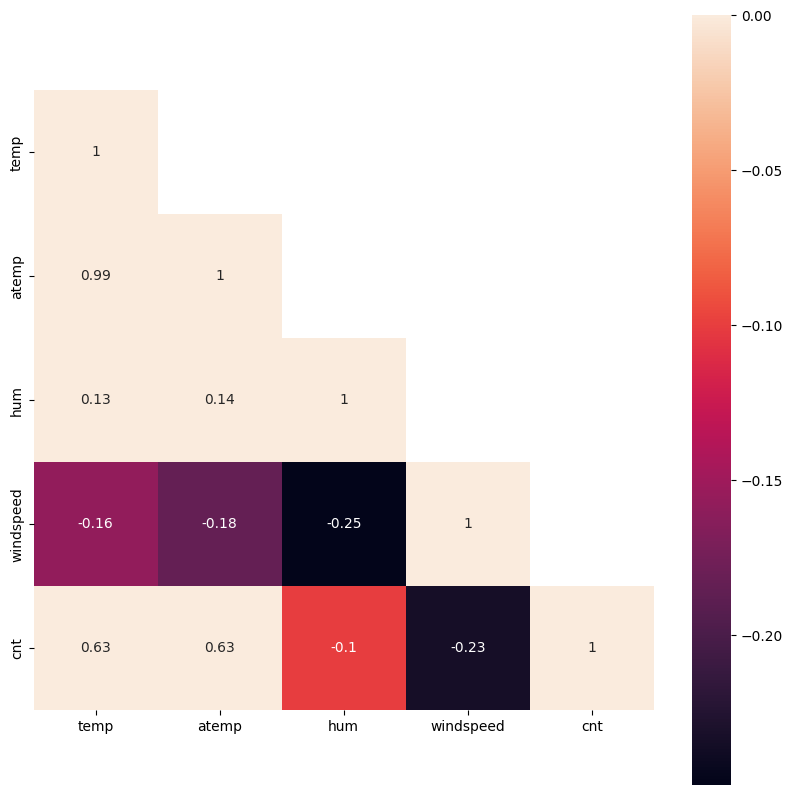

In [28]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=0,square=True,annot=True)

In [29]:
#atemp and temp are highly correlated ,both are similarly correlated to cnt ,can delete any of the column
data=data.drop('atemp',axis=1)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,cloudy,14.110847,80.5833,10.749882,985.0
1,spring,0,jan,0,sunday,0,cloudy,14.902598,69.6087,16.652113,801.0
2,spring,0,jan,0,monday,1,partly_cloudy,8.050924,43.7273,16.636703,1349.0
3,spring,0,jan,0,tuesday,1,partly_cloudy,8.200000,59.0435,10.739832,1562.0
4,spring,0,jan,0,wednesday,1,partly_cloudy,9.305237,43.6957,12.522300,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
726,spring,1,dec,0,thursday,1,cloudy,10.420847,65.2917,23.458911,2114.0
727,spring,1,dec,0,friday,1,cloudy,10.386653,59.0000,10.416557,3095.0
728,spring,1,dec,0,saturday,0,cloudy,10.386653,75.2917,8.333661,1341.0
729,spring,1,dec,0,sunday,0,partly_cloudy,10.489153,48.3333,23.500518,1796.0


In [30]:
d_category

,season,mnth,weekday,weathersit
0,spring,jan,saturday,cloudy
1,spring,jan,sunday,cloudy
2,spring,jan,monday,partly_cloudy
3,spring,jan,tuesday,partly_cloudy
4,spring,jan,wednesday,partly_cloudy
...,...,...,...,...
726,spring,dec,thursday,cloudy
727,spring,dec,friday,cloudy
728,spring,dec,saturday,cloudy
729,spring,dec,sunday,partly_cloudy


In [31]:
#create dummy variables columns for categorical data
pd.set_option('display.max_columns',None)
d_dummies=pd.get_dummies(d_category,drop_first=True).astype('int') #we get 22 columns, seson->3,mnts->11,weekday->6,weathersit->2
d_dummies.head()                             #drop_first|-------> #n category n-1 columns are created

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain,weathersit_partly_cloudy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [32]:
#since we got all dummy columns ,no need of category columns, drop it
data=data.drop(list(d_category),axis=1)
#concatenate dummy variables with orginal dataframe
data=pd.concat([data,d_dummies],axis=1)

In [33]:
data

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain,weathersit_partly_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,10.420847,65.2917,23.458911,2114.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
727,1,0,1,10.386653,59.0000,10.416557,3095.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
728,1,0,0,10.386653,75.2917,8.333661,1341.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
729,1,0,0,10.489153,48.3333,23.500518,1796.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        731 non-null    int64  
 1   holiday                   731 non-null    int64  
 2   workingday                731 non-null    int64  
 3   temp                      731 non-null    float64
 4   hum                       731 non-null    float64
 5   windspeed                 731 non-null    float64
 6   cnt                       731 non-null    float64
 7   season_spring             731 non-null    int32  
 8   season_summer             731 non-null    int32  
 9   season_winter             731 non-null    int32  
 10  mnth_aug                  731 non-null    int32  
 11  mnth_dec                  731 non-null    int32  
 12  mnth_feb                  731 non-null    int32  
 13  mnth_jan                  731 non-null    int32  
 14  mnth_jul  

In [35]:
#till now we done data exploration,data cleaning,data visualisation,data preparation
#these are very impotant in any project in company we do these steps
#now model building and evaluation

In [36]:
#split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=True) #this function splits data for training and testing
 #here random_state is true ,so that the split is same numbers not another numbers so that accuracy remain same wn we run jupyter nb again

In [37]:
df_train #randomly training data is selected

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain,weathersit_partly_cloudy
285,0,0,1,24.155847,89.6667,9.499729,2913.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
135,0,0,1,23.677500,78.7917,8.500357,3958.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
443,1,0,1,22.345000,72.8750,10.875239,6153.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
640,1,0,1,24.224153,87.1667,6.999825,4639.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
312,0,0,1,16.400000,75.8333,4.167119,4109.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,1,0,0,17.049153,70.8333,9.457854,3510.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
715,1,0,0,14.862500,83.8750,6.749714,3786.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
72,0,0,1,13.333897,49.6957,9.174042,2046.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
235,0,0,1,27.606653,60.5000,16.958236,5130.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #creating object of minmaxscaler

In [39]:
#apply scaler() to all the columns except the yes-no and dummy variables
var=['temp','hum','windspeed','cnt']
df_train[var]=scaler.fit_transform(df_train[var]) #transforms values between 0 and 1

In [40]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain,weathersit_partly_cloudy
285,0,0,1,0.670901,0.894432,0.298575,0.299650,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
135,0,0,1,0.656134,0.743040,0.261274,0.425812,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
443,1,0,1,0.614996,0.660673,0.349915,0.690813,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
640,1,0,1,0.673010,0.859629,0.205268,0.508028,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
312,0,0,1,0.431461,0.701856,0.099539,0.444042,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,1,0,0,0.451501,0.632250,0.297012,0.371725,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
715,1,0,0,0.383994,0.813805,0.195933,0.405046,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
72,0,0,1,0.336803,0.337991,0.286419,0.194978,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
235,0,0,1,0.777436,0.488399,0.576959,0.567307,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


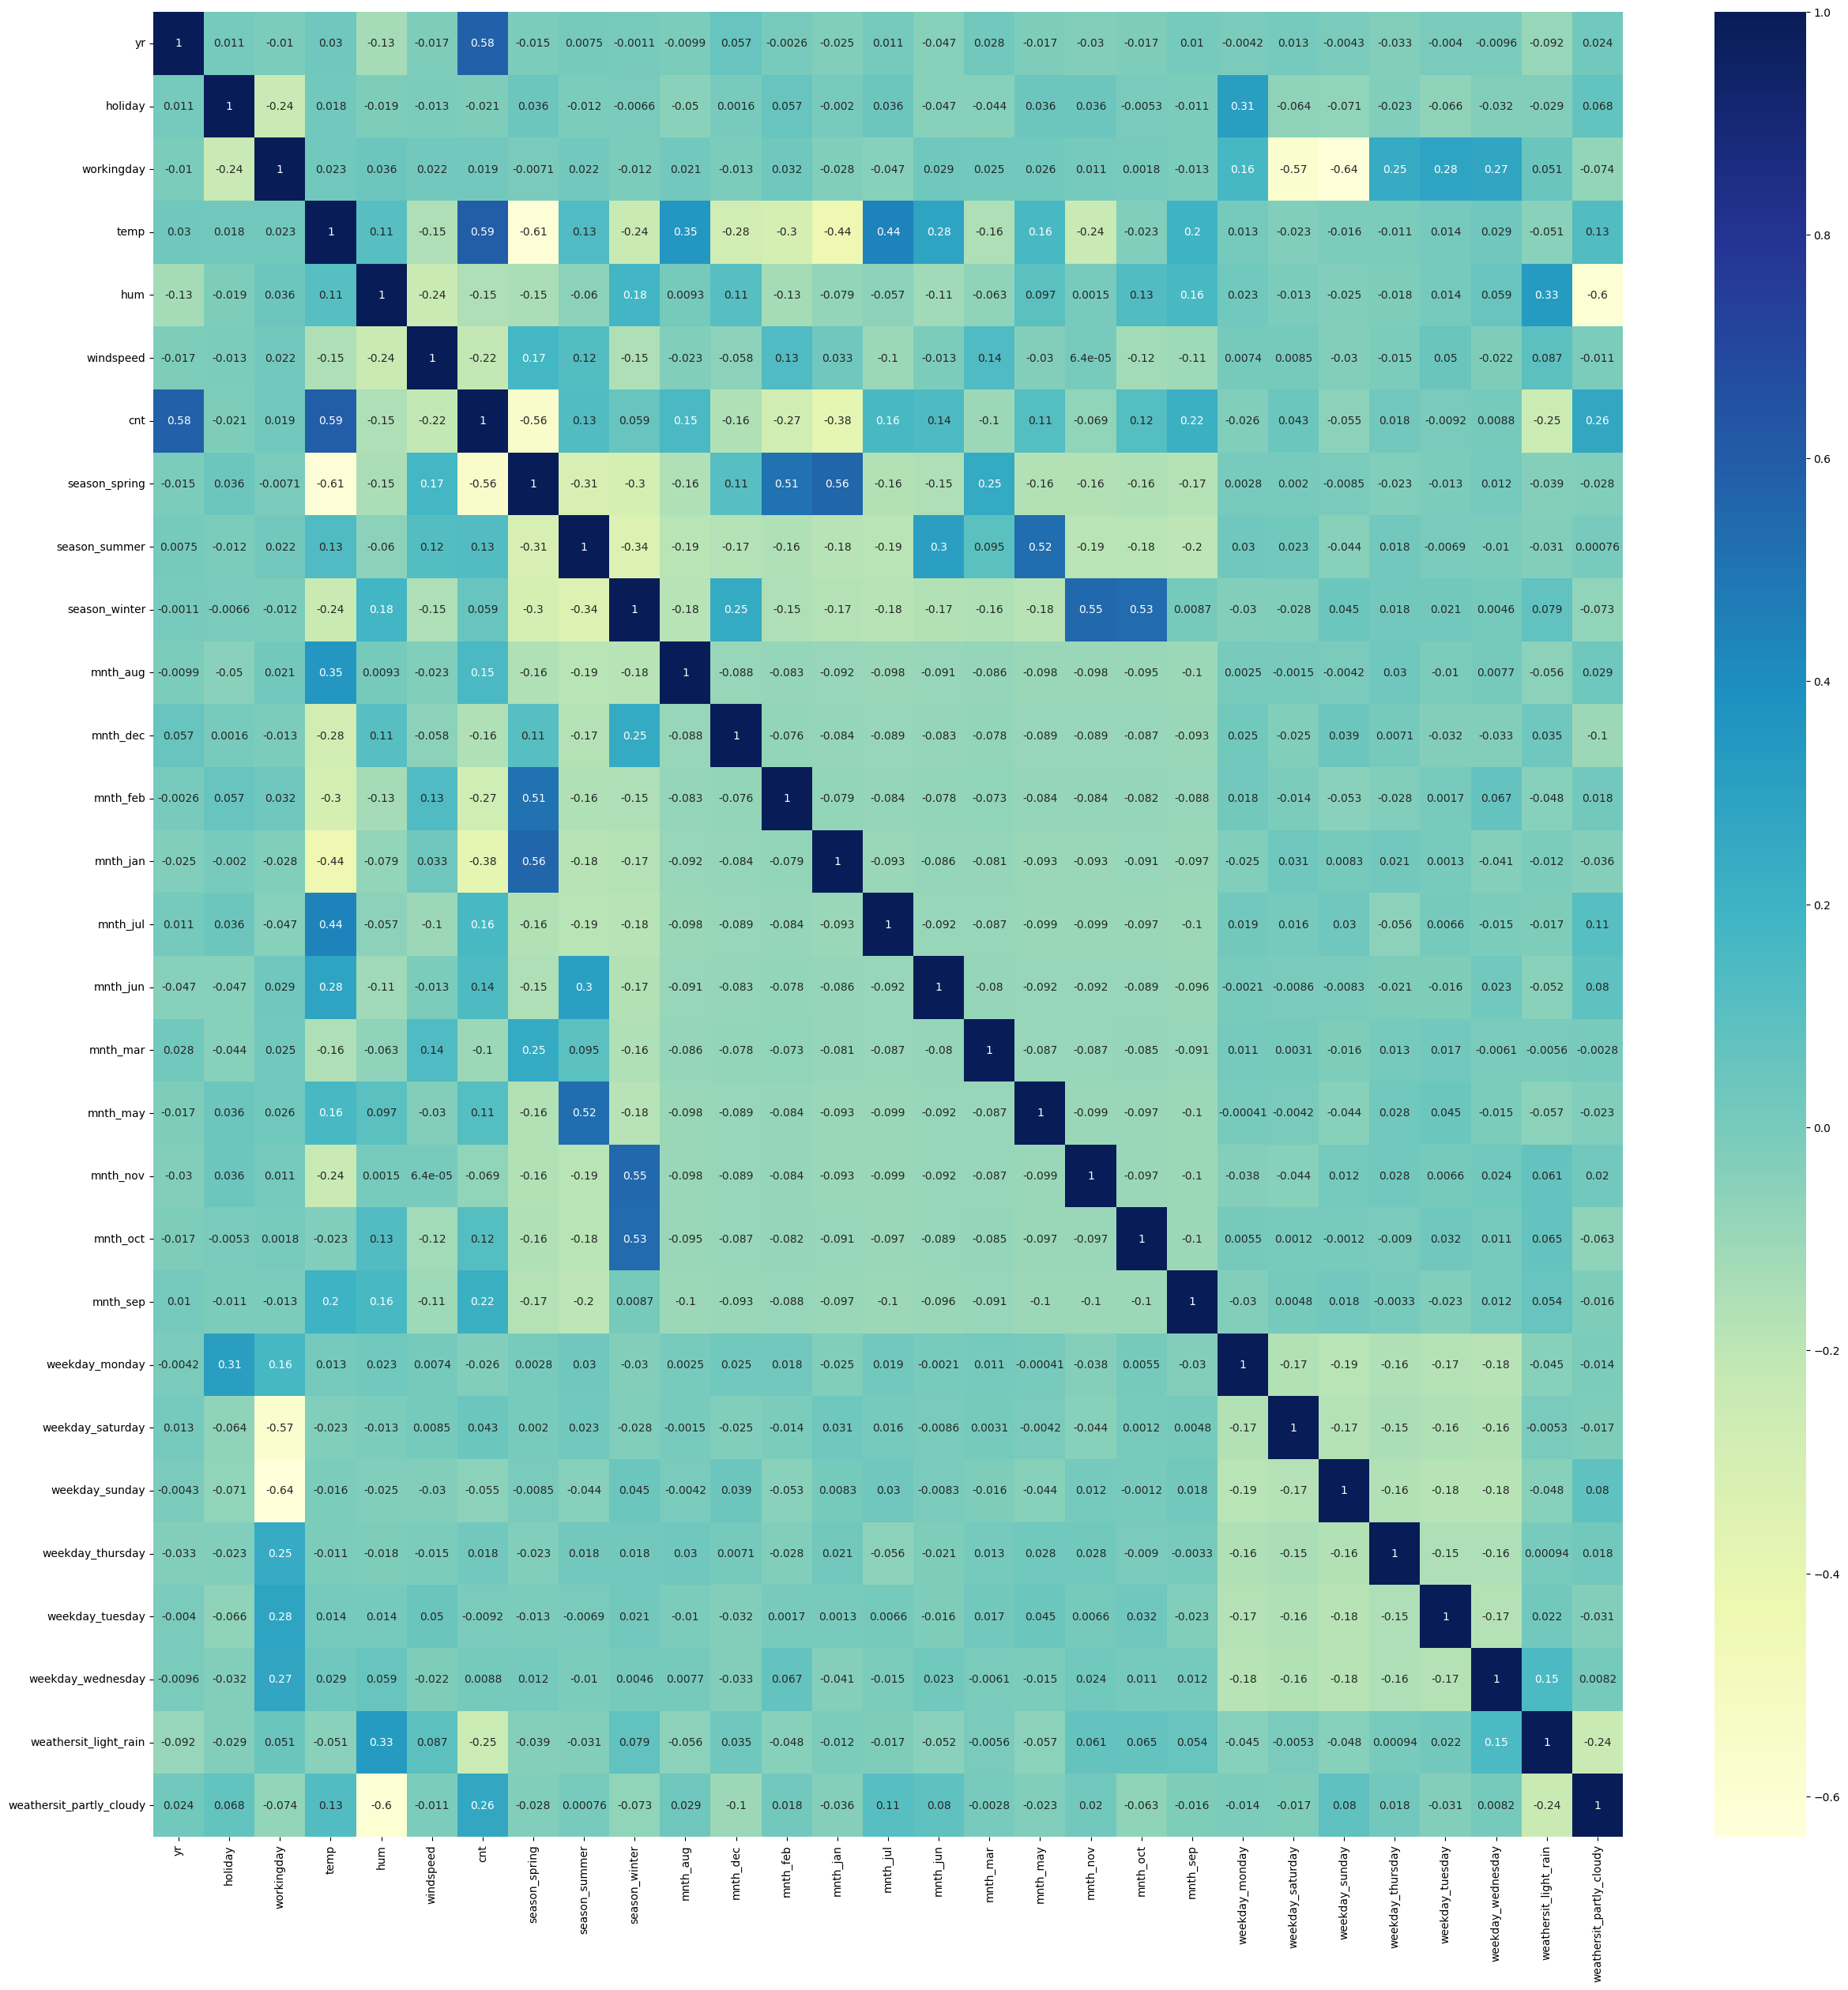

In [41]:
#check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

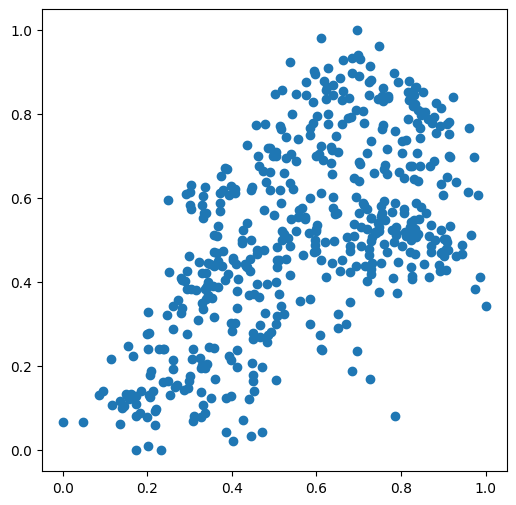

In [42]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp,df_train.cnt)
plt.show

In [43]:
#dividing into x and y x-->set of independent columns y--> target column
y_train=df_train.pop('cnt')
x_train=df_train

In [44]:
x_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain,weathersit_partly_cloudy
285,0,0,1,0.670901,0.894432,0.298575,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
135,0,0,1,0.656134,0.743040,0.261274,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
443,1,0,1,0.614996,0.660673,0.349915,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
640,1,0,1,0.673010,0.859629,0.205268,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
312,0,0,1,0.431461,0.701856,0.099539,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,1,0,0,0.451501,0.632250,0.297012,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
715,1,0,0,0.383994,0.813805,0.195933,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
72,0,0,1,0.336803,0.337991,0.286419,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
235,0,0,1,0.777436,0.488399,0.576959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [45]:
#this is done to convert all the features into array before the model and avoid error popping up
np.asarray(df_train)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [46]:
x_train.shape

(511, 28)

In [47]:
############# Model1:base model
import statsmodels.api as sm

In [48]:
#add constant to x_train data --->y=mx+c
x_train_lm=sm.add_constant(x_train)

In [50]:
x_train_lm

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain,weathersit_partly_cloudy
285,1.0,0,0,1,0.670901,0.894432,0.298575,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
135,1.0,0,0,1,0.656134,0.743040,0.261274,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
443,1.0,1,0,1,0.614996,0.660673,0.349915,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
640,1.0,1,0,1,0.673010,0.859629,0.205268,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
312,1.0,0,0,1,0.431461,0.701856,0.099539,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,1.0,1,0,0,0.451501,0.632250,0.297012,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
715,1.0,1,0,0,0.383994,0.813805,0.195933,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
72,1.0,0,0,1,0.336803,0.337991,0.286419,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
235,1.0,0,0,1,0.777436,0.488399,0.576959,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [52]:
lr=sm.OLS(y_train,x_train_lm).fit()  #here we are building the model by fit

In [54]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     99.01
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          8.46e-178
Time:                        08:28:08   Log-Likelihood:                 508.22
No. Observations:                 511   AIC:                            -960.4
Df Residuals:                     483   BIC:                            -841.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2056      0.038      5.408      0.000       0.131       0.280
yr                           0.2465      0.008     29.177      0.000       0.230       0.263
holiday                      0.0230      0.026      0.891      0.373      -0.028       0.074
workingday                   0.0682      0.013      5.366      0.000       0.043       0.093
temp                         0.3962      0.048      8.184      0.000       0.301       0.491
hum                         -0.1450      0.032     -4.579      0.000      -0.207      -0.083
windspeed                   -0.1208      0.024     -5.127      0.000      -0.167      -0.074
season_spring               -0.0959      0.032     -3.027      0.003      -0.158      -0.034
season_summer                0.0013      0.028      0.047      0.963      -0.054       0.057
season_winter                0.0720      0.026      2.730      0.007       0.020       0.124
mnth_aug                    -0.0072      0.035     -0.203      0.839      -0.077       0.062
mnth_dec                    -0.0685      0.035     -1.935      0.054      -0.138       0.001
mnth_feb                    -0.0601      0.036     -1.692      0.091      -0.130       0.010
mnth_jan                    -0.0731      0.036     -2.018      0.044      -0.144      -0.002
mnth_jul                    -0.0458      0.036     -1.258      0.209      -0.117       0.026
mnth_jun                     0.0054      0.025      0.217      0.828      -0.043       0.054
mnth_mar                 -3.176e-05      0.026     -0.001      0.999      -0.052       0.052
mnth_may                     0.0314      0.021      1.492      0.136      -0.010       0.073
mnth_nov                    -0.0497      0.038     -1.309      0.191      -0.124       0.025
mnth_oct                     0.0291      0.037      0.785      0.433      -0.044       0.102
mnth_sep                     0.0765      0.033      2.320      0.021       0.012       0.141
weekday_monday              -0.0115      0.016     -0.732      0.464      -0.043       0.019
weekday_saturday             0.0897      0.014      6.194      0.000       0.061       0.118
weekday_sunday               0.0248      0.014      1.737      0.083      -0.003       0.053
weekday_thursday             0.0115      0.016      0.715      0.475      -0.020       0.043
weekday_tuesday             -0.0091      0.016     -0.589      0.556      -0.040       0.021
weekday_wednesday            0.0091      0.016      0.584      0.560      -0.022       0.040
weathersit_light_rain       -0.1730      0.026     -6.640      0.000      -0.224      -0.122
weathersit_partly_cloudy     0.0512      0.012      4.448      0.000       0.029       0.074
==============================================================================
Omnibus:                    

In [58]:
#another way for model building using linar regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()   #instantiate
lm.fit(x_train,y_train) #fit a line

LinearRegression()

In [59]:
print(lm.coef_)
print(lm.intercept_)

[ 2.46332876e-01 -5.70647931e+11 -5.70647931e+11  3.96740637e-01
 -1.45406924e-01 -1.20813805e-01 -9.57721271e-02  1.68759432e-03
  7.20158986e-02 -6.97387843e-03 -6.80399294e-02 -5.97740121e-02
 -7.27359198e-02 -4.55049734e-02  5.36727871e-03  3.89989337e-04
  3.14734478e-02 -4.93621826e-02  2.96401978e-02  7.67974854e-02
 -1.17683411e-02 -5.70647931e+11 -5.70647931e+11  1.12304688e-02
 -9.37271118e-03  9.07897949e-03 -1.73156738e-01  5.11779785e-02]
570647931480.7751


In [63]:
## model building using RFE (feature selection using rfe) (recursive feature elimination in sklearn)
from sklearn.feature_selection import RFE
rfe=RFE(lm,n_features_to_select=15) #select 15 best features
rfe.fit(x_train,y_train)
rfe.support_ #gives true if it is important feature

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True])

In [65]:
#again build model using these 15 feature 
#subset the features selected by rfe
col1=x_train.columns[rfe.support_]
#subsetting training data for 15 selected columns
x_train_rfe1=x_train[col1]
#add a constant to the model
x_train_rfe1=sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weathersit_light_rain,weathersit_partly_cloudy
285,1.0,0,0,0.670901,0.894432,0.298575,0,1,0,0,0,0,0,0,0,0
135,1.0,0,0,0.656134,0.743040,0.261274,0,0,0,0,0,0,0,0,0,1
443,1.0,1,0,0.614996,0.660673,0.349915,1,0,0,0,0,0,0,0,0,1
640,1.0,1,0,0.673010,0.859629,0.205268,0,1,0,0,0,0,0,0,1,0
312,1.0,0,0,0.431461,0.701856,0.099539,0,1,0,0,0,0,1,0,0,1


In [66]:
#fitting model with 15 variables
lm1=sm.OLS(y_train,x_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          3.84e-184
Time:                        09:35:36   Log-Likelihood:                 492.71
No. Observations:                 511   AIC:                            -953.4
Df Residuals:                     495   BIC:                            -885.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [72]:
#we can see that r2(accuracy) is same it is not effected after we removed unnecessary columns 

#check the vif(varaiance inflation factor) value for feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
a=x_train_rfe1.drop('const',axis=1)
#create a dataframe that will contain the names of all the feature variables and their respective vif's except for constant
vif=pd.DataFrame()
vif['Features']=a.columns
vif['vif']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,Features,vif
2,temp,18.77
3,hum,12.59
4,windspeed,4.99
5,season_spring,4.74
14,weathersit_partly_cloudy,4.01
6,season_winter,2.76
9,mnth_jan,2.57
8,mnth_feb,2.24
0,yr,2.02
11,mnth_nov,1.89


In [89]:
x_train_rfe2=x_train_rfe1.drop(['const','holiday'],axis=1)
x_train_rfe2=sm.add_constant(x_train_rfe2)

lm2=sm.OLS(y_train,x_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          1.06e-184
Time:                        12:05:18   Log-Likelihood:                 491.33
No. Observations:                 511   AIC:                            -952.7
Df Residuals:                     496   BIC:                            -889.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [90]:
b=x_train_rfe2.drop('const',axis=1)

vif=pd.DataFrame()
vif['Features']=b.columns
vif['vif']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,Features,vif
1,temp,18.75
2,hum,12.59
3,windspeed,4.99
4,season_spring,4.73
13,weathersit_partly_cloudy,4.00
5,season_winter,2.76
8,mnth_jan,2.57
7,mnth_feb,2.23
0,yr,2.02
10,mnth_nov,1.89


In [91]:
x_train_rfe2=x_train_rfe2.drop(['const','hum','temp','mnth_feb'],axis=1)
x_train_rfe2=sm.add_constant(x_train_rfe2)

lm3=sm.OLS(y_train,x_train_rfe2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     169.1
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          2.07e-160
Time:                        12:05:33   Log-Likelihood:                 425.48
No. Observations:                 511   AIC:                            -827.0
Df Residuals:                     499   BIC:                            -776.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [92]:
b=x_train_rfe2.drop('const',axis=1)

vif=pd.DataFrame()
vif['Features']=b.columns
vif['vif']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,Features,vif
1,windspeed,3.17
10,weathersit_partly_cloudy,2.49
3,season_winter,2.32
2,season_spring,2.27
0,yr,1.86
7,mnth_nov,1.77
5,mnth_jan,1.66
4,mnth_dec,1.38
6,mnth_jul,1.18
8,mnth_sep,1.16


In [94]:
x_train_rfe2=x_train_rfe2.drop(['const','season_winter'],axis=1)
x_train_rfe2=sm.add_constant(x_train_rfe2)

lm4=sm.OLS(y_train,x_train_rfe2).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     185.3
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          4.43e-161
Time:                        12:08:07   Log-Likelihood:                 424.35
No. Observations:                 511   AIC:                            -826.7
Df Residuals:                     500   BIC:                            -780.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [95]:
x_train_rfe2=x_train_rfe2.drop(['mnth_jul'],axis=1)
x_train_rfe2=sm.add_constant(x_train_rfe2)

lm5=sm.OLS(y_train,x_train_rfe2).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          4.46e-162
Time:                        12:09:27   Log-Likelihood:                 423.95
No. Observations:                 511   AIC:                            -827.9
Df Residuals:                     501   BIC:                            -785.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [96]:
b=x_train_rfe2.drop('const',axis=1)

vif=pd.DataFrame()
vif['Features']=b.columns
vif['vif']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,Features,vif
1,windspeed,3.11
8,weathersit_partly_cloudy,2.35
2,season_spring,2.08
0,yr,1.83
4,mnth_jan,1.65
5,mnth_nov,1.14
3,mnth_dec,1.13
6,mnth_sep,1.13
7,weathersit_light_rain,1.11


In [99]:
#model equation: cnt=0.2547(yr)+(-0.1304)windspeed+(-0.2535)season_spring+(-0.1224)mnth_dec+(-0.0987)mnth_jan+(-0.1071)mnth_nov+(0.0749)mnth_sep+(-0.2040)weathersit_light_rain+(0.0876)weathersit_partly_cloudy 

In [100]:
#residual analysis
y_train_cnt=lm5.predict(x_train_rfe2)

Text(0.5, 0, 'Errors')

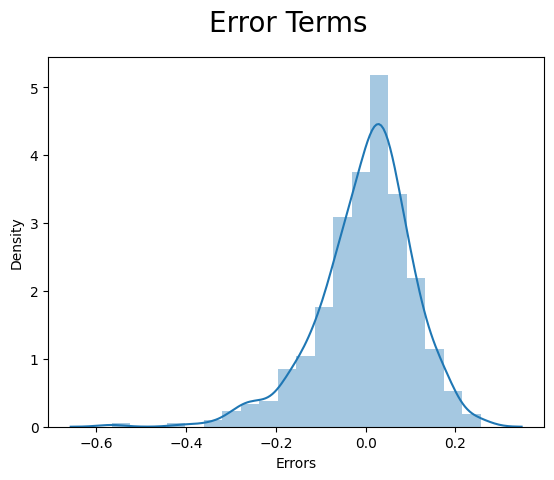

In [101]:
#plot the histogram of the error term
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
#plot heading
fig.suptitle('Error Terms',fontsize=20)
#give the xlabel
plt.xlabel("Errors",fontsize=10)

In [102]:
x_train_rfe2

,const,yr,windspeed,season_spring,mnth_dec,mnth_jan,mnth_nov,mnth_sep,weathersit_light_rain,weathersit_partly_cloudy
285,1.0,0,0.298575,0,0,0,0,0,0,0
135,1.0,0,0.261274,0,0,0,0,0,0,1
443,1.0,1,0.349915,1,0,0,0,0,0,1
640,1.0,1,0.205268,0,0,0,0,0,1,0
312,1.0,0,0.099539,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
645,1.0,1,0.297012,0,0,0,0,0,0,0
715,1.0,1,0.195933,0,1,0,0,0,0,0
72,1.0,0,0.286419,1,0,0,0,0,0,1
235,1.0,0,0.576959,0,0,0,0,0,0,1


In [104]:
#we are doing testing now
#recall the variables that you scaled
var

['temp', 'hum', 'windspeed', 'cnt']

In [106]:
df_test[var]=scaler.fit_transform(df_test[var])

In [107]:
#split the df_test set into x and y after scaling
y_test=df_test.pop('cnt')
x_test=df_test

In [108]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_rain,weathersit_partly_cloudy
404,1,0,1,0.219304,0.591926,0.319841,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
726,1,0,1,0.205130,0.687583,0.658582,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
159,0,0,1,0.930216,0.598508,0.224024,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
422,1,0,1,0.352328,0.516893,0.480418,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
512,1,0,0,0.775386,0.734094,0.365704,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [110]:
#we altready have col1 selected during rfe process
col1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_light_rain',
       'weathersit_partly_cloudy'],
      dtype='object')

In [113]:
col2=['yr','windspeed','season_spring','mnth_dec','mnth_jan','mnth_nov','mnth_sep','weathersit_light_rain','weathersit_partly_cloudy']

In [114]:
x_test_rfe2=x_test[col2] #create a subset of these columns and create dataframe x_test_rfe2

In [116]:
x_test_rfe2=sm.add_constant(x_test_rfe2) #add constant to set created
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 404 to 541
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     220 non-null    float64
 1   yr                        220 non-null    int64  
 2   windspeed                 220 non-null    float64
 3   season_spring             220 non-null    int32  
 4   mnth_dec                  220 non-null    int32  
 5   mnth_jan                  220 non-null    int32  
 6   mnth_nov                  220 non-null    int32  
 7   mnth_sep                  220 non-null    int32  
 8   weathersit_light_rain     220 non-null    int32  
 9   weathersit_partly_cloudy  220 non-null    int32  
dtypes: float64(2), int32(7), int64(1)
memory usage: 12.9 KB


In [117]:
y_pred=lm5.predict(x_test_rfe2) #make predictions

Text(0, 0.5, 'y_pred')

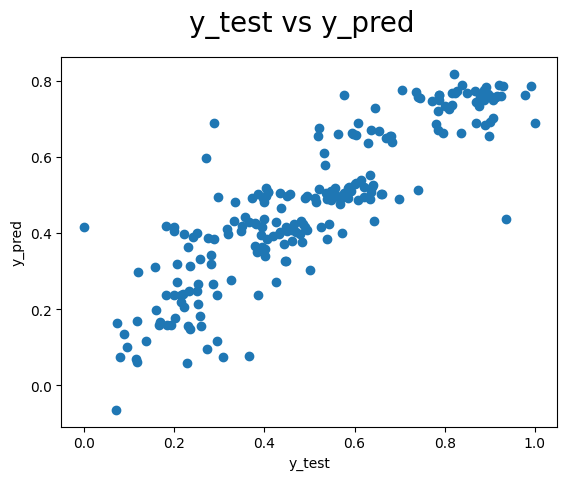

In [119]:
#plotting the y_test and y_predict to understand the spread
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=10)
plt.ylabel('y_pred',fontsize=10)

In [120]:
#r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7491881413748039